Variables

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

In [6]:
# ================================================
# PASO 1: Análisis Exploratorio de Datos
# ================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('Car details v3.csv')

# Mostrar primeras filas y resumen
display(df.head())
display(df.info())
display(df.isnull().sum())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


None

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
# ================================================
# PASO 2: Preprocesamiento de Datos
# ================================================
# Limpiar columnas con unidades (convertir a float)
def extract_float(s):
    try:
        return float(str(s).split()[0])
    except:
        return np.nan

for col in ['mileage', 'engine', 'max_power']:
    df[col] = df[col].apply(extract_float)

# Eliminar columnas irrelevantes o muy sucias
df = df.drop(columns=['torque'], errors='ignore')

# Eliminar filas con valores faltantes
df = df.dropna()

# Codificar variables categóricas
from sklearn.preprocessing import LabelEncoder

cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Variables predictoras y objetivo
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [10]:
# ================================================
# PASO 3: Selección de Características
# ================================================
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=7)
X_selected = selector.fit_transform(X_scaled_df, y)
selected_features = X_scaled_df.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))

Características seleccionadas: ['year', 'km_driven', 'seller_type', 'transmission', 'owner', 'engine', 'max_power']


In [12]:
# ================================================
# PASO 4: División Train/Test
# ================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df[selected_features], y, test_size=0.3, random_state=42)

In [14]:
# ================================================
# PASO 5: Entrenamiento del Modelo de Regresión Lineal
# ================================================
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# ================================================
# PASO 6: Evaluación del Modelo
# ================================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

MAE: 274,789.00
RMSE: 464442.20
R² Score: 0.68


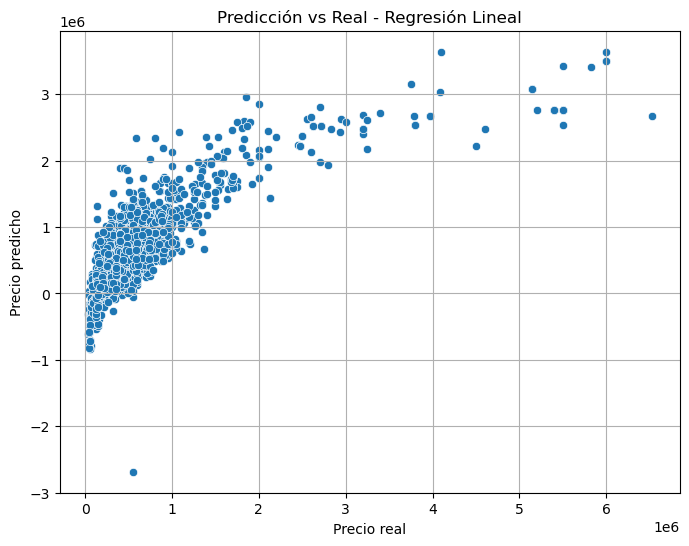

In [18]:
# ================================================
# PASO 7: Visualización de Resultados
# ================================================
# Real vs Predicción
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Predicción vs Real - Regresión Lineal")
plt.grid(True)
plt.show()

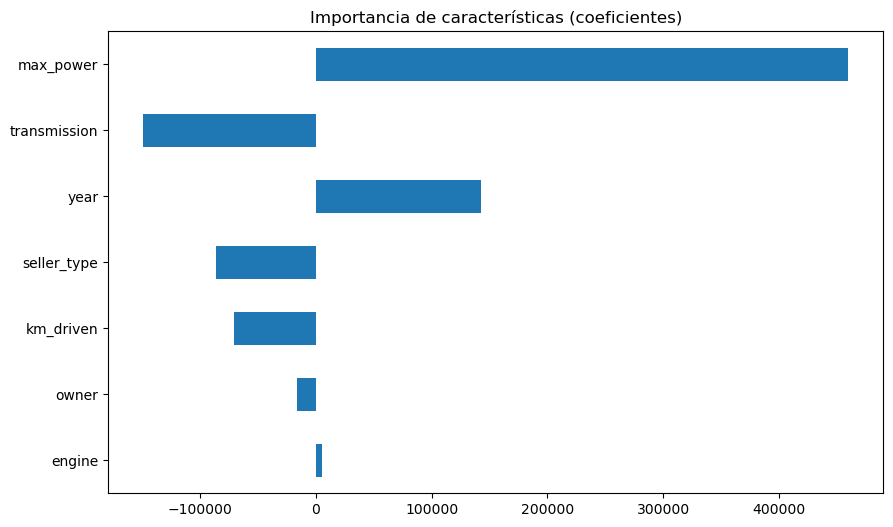

In [20]:
# Coeficientes
coefs = pd.Series(model.coef_, index=selected_features).sort_values(key=abs)
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh')
plt.title("Importancia de características (coeficientes)")
plt.show()

In [22]:
# ================================================
# PASO 8: Interpretación
# ================================================
print("Interpretación:")
print("""
El modelo de Regresión Lineal permite estimar el precio de venta basado en las características del vehículo.
La limpieza de datos fue esencial para convertir los valores numéricos con unidades.
El R² obtenido indica qué tan bien las variables seleccionadas explican el precio.
Podrías mejorar resultados con modelos no lineales como Random Forest o XGBoost.
""")

Interpretación:

El modelo de Regresión Lineal permite estimar el precio de venta basado en las características del vehículo.
La limpieza de datos fue esencial para convertir los valores numéricos con unidades.
El R² obtenido indica qué tan bien las variables seleccionadas explican el precio.
Podrías mejorar resultados con modelos no lineales como Random Forest o XGBoost.

